In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,KFold
from imblearn.over_sampling import RandomOverSampler

In [332]:
df = pd.read_csv("BRCA Data.csv")
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [333]:
df.shape

(341, 16)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [335]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

# Feature Engineering

In [336]:
df.dropna(inplace=True)

In [337]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [338]:
# for i in df.iloc[:,2:]:
#     status = df[i].value_counts()
#     fig = px.pie(values= status.values, names= status.index, hole= 0.5,title= i, width= 700,height= 400)
#     fig.show()
    

* It seems PR status & ER status are biased 
* Target variable is imbalanced

In [339]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [340]:
df.drop(['Patient_ID','ER status', 'PR status', 'Date_of_Surgery', 'Date_of_Last_Visit'],axis=1,inplace= True)
df.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive


In [341]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


# Balancing the imbalanced Target variable

In [342]:
ran = RandomOverSampler()
X,Y = ran.fit_resample(df.iloc[:,:-1],df['Patient_Status'])

In [343]:
X.shape

(510, 10)

In [344]:
Y.value_counts()

Patient_Status
Alive    255
Dead     255
Name: count, dtype: int64

* Target variable is in balanced now

# Spliting the data for Training and Testing

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [346]:
x_train.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
310,46.0,FEMALE,-0.055036,-0.50643,0.88778,-0.089424,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy
349,32.0,FEMALE,0.125450,1.45650,-0.68030,-0.010378,I,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
485,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Simple Mastectomy
137,38.0,FEMALE,-0.268450,0.19515,-1.02470,0.101720,III,Infiltrating Ductal Carcinoma,Negative,Other
497,68.0,FEMALE,-0.416130,0.75843,0.43992,0.201870,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy


In [347]:
x_train['Surgery_type'].value_counts()

Surgery_type
Other                          140
Modified Radical Mastectomy    106
Simple Mastectomy               85
Lumpectomy                      77
Name: count, dtype: int64

# Encoding the categorical variables

In [348]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [349]:
ohe = OneHotEncoder(drop='first')
ohe.fit(x_train[['Gender','Histology','HER2 status','Surgery_type']])

OneHotEncoder(drop='first')

In [350]:
x_train_ohe = pd.DataFrame(ohe.fit_transform(x_train[['Gender','Histology','HER2 status','Surgery_type']]).toarray(),
                             columns= ohe.get_feature_names_out()).astype(int)
x_test_ohe = pd.DataFrame(ohe.fit_transform(x_test[['Gender','Histology','HER2 status','Surgery_type']]).toarray(),
                             columns= ohe.get_feature_names_out()).astype(int)

In [351]:
x_train_ohe.head()

,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0


In [352]:
x_test_ohe.head()

,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1
4,0,0,1,1,1,0,0


In [353]:
df['Tumour_Stage'].value_counts()

Tumour_Stage
II     180
III     77
I       60
Name: count, dtype: int64

In [354]:
ord = OrdinalEncoder(categories=[['I','II','III']])
ord.fit(x_train[['Tumour_Stage']])

OrdinalEncoder(categories=[['I', 'II', 'III']])

In [355]:
x_train_ord = pd.DataFrame(ord.fit_transform(x_train[['Tumour_Stage']]),columns= ['Tumour_Stage']).astype(int)
x_test_ord = pd.DataFrame(ord.fit_transform(x_test[['Tumour_Stage']]),columns= ['Tumour_Stage']).astype(int)

In [356]:
lab = LabelEncoder()
lab.fit(y_train)

LabelEncoder()

In [357]:
lab.classes_

array(['Alive', 'Dead'], dtype=object)

In [358]:
y_train_final = pd.DataFrame(lab.fit_transform(y_train),columns=['Patient Status'])
y_test_final = pd.DataFrame(lab.fit_transform(y_test),columns=['Patient Status'])

In [359]:
y_test_final.head()

,Patient Status
0,1
1,1
2,1
3,1
4,1


In [360]:
x_train_reduced = x_train.drop(columns=['Gender','Histology','HER2 status','Surgery_type','Tumour_Stage'])
x_train_final = pd.concat([
    x_train_reduced.reset_index(drop=True), 
    x_train_ohe.reset_index(drop=True), 
    x_train_ord.reset_index(drop=True)
], axis=1)


In [361]:
x_train_final.head()

,Age,Protein1,Protein2,Protein3,Protein4,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Tumour_Stage
0,46.0,-0.055036,-0.50643,0.88778,-0.089424,0,0,0,0,0,0,0,1
1,32.0,0.125450,1.45650,-0.68030,-0.010378,0,0,0,0,1,0,0,0
2,36.0,0.231800,0.61804,-0.55779,-0.517350,0,0,0,1,0,0,1,2
3,38.0,-0.268450,0.19515,-1.02470,0.101720,0,0,0,0,0,1,0,2
4,68.0,-0.416130,0.75843,0.43992,0.201870,0,1,0,0,0,0,0,1


In [362]:
x_test_reduced = x_test.drop(columns=['Gender','Histology','HER2 status','Surgery_type','Tumour_Stage'])
x_test_final = pd.concat([
    x_test_reduced.reset_index(drop=True), 
    x_test_ohe.reset_index(drop=True), 
    x_test_ord.reset_index(drop=True)
], axis=1)

In [363]:
x_test_final.head()

,Age,Protein1,Protein2,Protein3,Protein4,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Tumour_Stage
0,60.0,0.094585,1.00030,-0.225750,0.048602,0,0,0,0,0,0,1,2
1,73.0,0.448570,2.30130,0.011659,0.606860,0,1,0,0,0,1,0,1
2,82.0,-0.976740,-0.49960,0.657940,-0.717850,0,0,0,0,0,1,0,0
3,63.0,0.903140,1.96780,-0.790790,0.962650,0,1,0,0,0,0,1,1
4,79.0,-0.036229,0.79551,-0.013525,1.629900,0,0,1,1,1,0,0,1


In [364]:
x_train_final.shape , x_train.shape

((408, 13), (408, 10))

# Scaling

In [365]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train_final[['Age','Protein1','Protein2','Protein3','Protein4','Tumour_Stage']])
X_train = pd.DataFrame(std.fit_transform(x_train_final[['Age','Protein1','Protein2','Protein3','Protein4','Tumour_Stage']]),columns= ['Age','Protein1','Protein2','Protein3','Protein4','Tumour_Stage'])
X_test = pd.DataFrame(std.fit_transform(x_test_final[['Age','Protein1','Protein2','Protein3','Protein4','Tumour_Stage']]),columns= ['Age','Protein1','Protein2','Protein3','Protein4','Tumour_Stage'])

In [366]:
X_train

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage
0,-0.989361,-0.024706,-1.674390,1.871887,-0.185577,-0.102156
1,-2.074675,0.316505,0.543864,-1.018065,-0.059318,-1.645851
2,-1.764585,0.517561,-0.403657,-0.792280,-0.869099,1.441538
3,-1.609540,-0.428168,-0.881554,-1.652790,0.119735,1.441538
4,0.716132,-0.707358,-0.245006,1.046487,0.279704,-0.102156
...,...,...,...,...,...,...
403,-0.679271,0.191633,0.787960,-0.531240,0.438730,-0.102156
404,-0.446704,0.585015,0.793384,-0.087467,0.701037,1.441538
405,-0.911839,0.706726,-1.472356,0.241946,1.819380,-0.102156
406,1.026222,-0.625253,-0.474343,-0.995212,-0.602911,-0.102156


In [367]:
X_train_trans = pd.concat([X_train.reset_index(drop=True),
                     x_train_final[['Gender_MALE',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy']].reset_index(drop=True)], axis=1)


In [368]:
X_test_trans = pd.concat([X_test.reset_index(drop=True),
                     x_test_final[['Gender_MALE',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy']].reset_index(drop=True)], axis=1)


In [369]:
X_train_trans.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Gender_MALE,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,-0.989361,-0.024706,-1.674390,1.871887,-0.185577,-0.102156,0,0,0,0,0,0,0
1,-2.074675,0.316505,0.543864,-1.018065,-0.059318,-1.645851,0,0,0,0,1,0,0
2,-1.764585,0.517561,-0.403657,-0.792280,-0.869099,1.441538,0,0,0,1,0,0,1
3,-1.609540,-0.428168,-0.881554,-1.652790,0.119735,1.441538,0,0,0,0,0,1,0
4,0.716132,-0.707358,-0.245006,1.046487,0.279704,-0.102156,0,1,0,0,0,0,0


# Checking the Multi-colinearity

Text(0.5, 1.0, 'Relationship among independent variables')

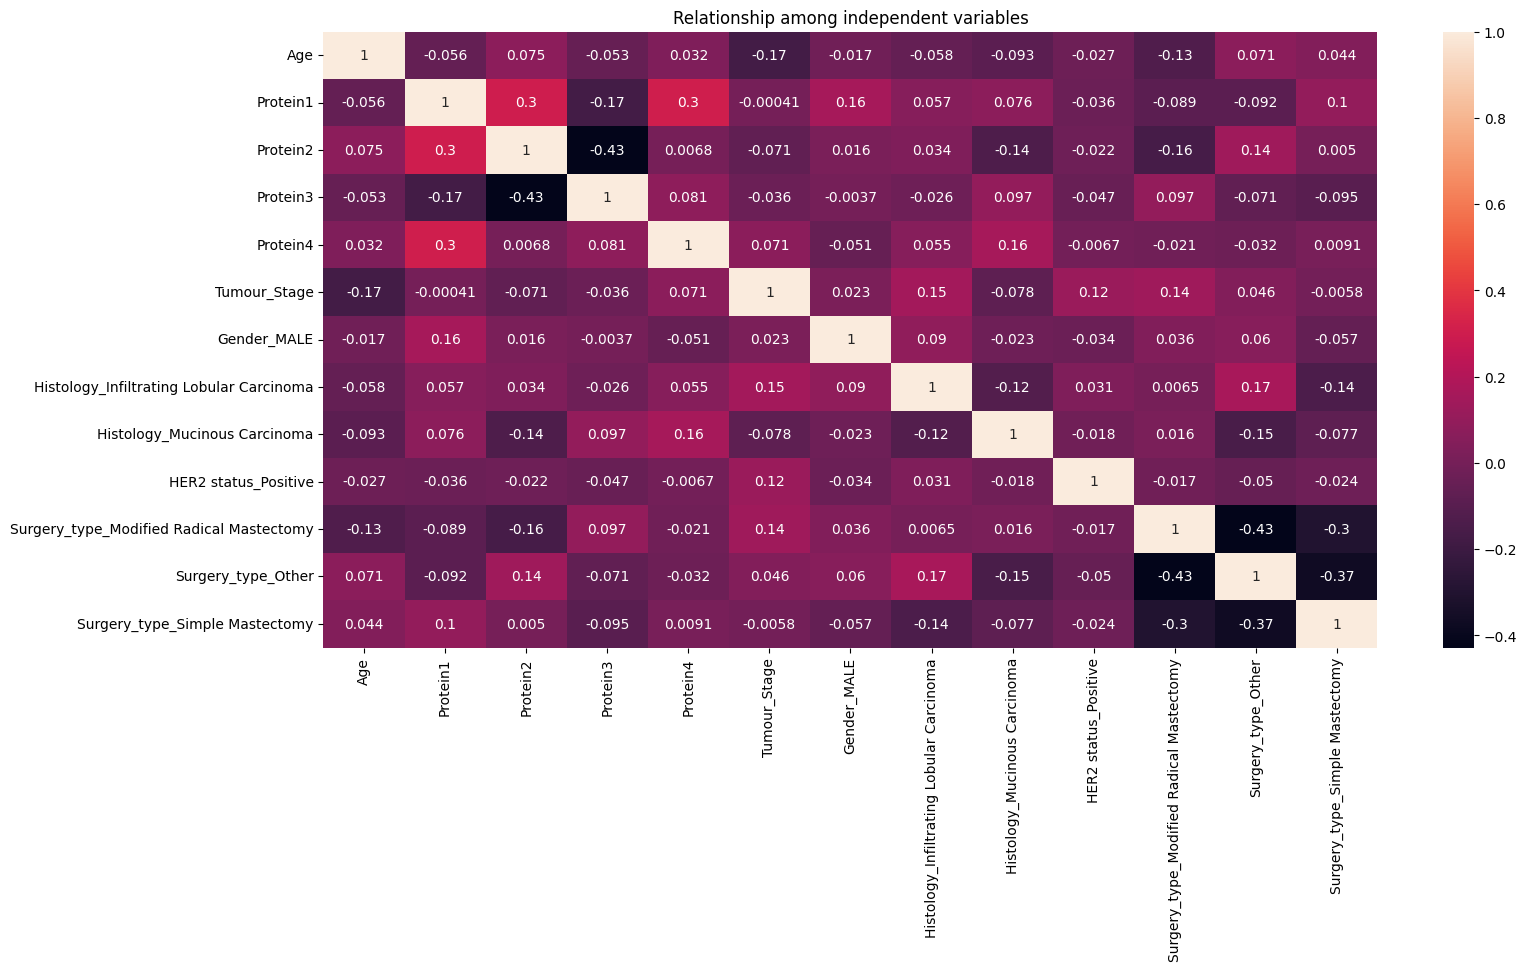

In [429]:
plt.figure(figsize=(17,8))
sns.heatmap(X_train_trans.corr(),annot=True)
plt.title('Relationship among independent variables')

* Most of the correlation coefficients are very low (close to 0), indicating little to no multicollinearity for the majority of variable pairs.

# Model making sections
## 1.DecisionTree

In [370]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


## Hyperparameter Tunning

In [371]:
dfir = { 'criterion': ["gini", "entropy", "log_loss"],
    'splitter':['best', 'random'],
    'max_depth':[i for i in range(2,20)]}

gd =GridSearchCV(DecisionTreeClassifier(),param_grid=dfir,cv=5)
gd.fit(X_train_trans,y_train_final)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [372]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 18, 'splitter': 'best'}

In [373]:
gd.best_score_

0.8576633544113219

In [421]:
Dt = DecisionTreeClassifier(criterion='entropy',max_depth = 18, splitter = 'best')
Dt.fit(X_train_trans,y_train_final)
Dt.score(X_test_trans,y_test_final)

0.7352941176470589

In [375]:
validation_D = cross_val_score(DecisionTreeClassifier(),X_train_trans,y_train_final,cv=KFold(n_splits=10))
validation_D.mean()

0.8579878048780488

### Result

In [422]:
print(f'''DecisionTree:
    Validation Score: {validation_D.mean()}  
    Prediction Score: {Dt.score(X_test_trans,y_test_final)}
    Diferrence: {(validation_D.mean()-(Dt.score(X_test_trans,y_test_final)))}''')

DecisionTree:
    Validation Score: 0.8579878048780488  
    Prediction Score: 0.7352941176470589
    Diferrence: 0.12269368723098995


# 2.ExtraTrees

In [377]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [378]:
lis = {'criterion':['gini','entropy'], 
        'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':[i for i in range(0,20)]}

fg = GridSearchCV(ExtraTreesClassifier(),param_grid= lis,cv=5)
fg.fit(X_train_trans,y_train_final)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [379]:
fg.best_params_

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt'}

In [380]:
fg.best_score_

0.9362541403191809

In [423]:
Et =(ExtraTreesClassifier(criterion = 'entropy',max_depth = 16,max_features = 'sqrt'))
Et.fit(X_train_trans,y_train_final)
Et.score(X_test_trans,y_test_final)

0.9803921568627451

In [382]:
validation_E = cross_val_score(ExtraTreesClassifier(),X_train_trans,y_train_final ,cv= KFold(n_splits=10))
validation_E

array([0.90243902, 0.95121951, 0.97560976, 0.90243902, 0.97560976,
       0.97560976, 0.90243902, 0.97560976, 1.        , 0.95      ])

In [383]:
validation_E.mean()

0.9510975609756096

### Result

In [424]:
print(f'''ExtraTreesClassifier:
    Validation Score: {validation_E.mean()}  
    Prediction Score: {Et.score(X_test_trans,y_test_final)}
    Diferrence: {(validation_E.mean()-(Et.score(X_test_trans,y_test_final)))}''')

ExtraTreesClassifier:
    Validation Score: 0.9510975609756096  
    Prediction Score: 0.9803921568627451
    Diferrence: -0.029294595887135455


# 3.RandomForest

In [385]:
from sklearn.ensemble import RandomForestClassifier

In [386]:
Rf = RandomForestClassifier()
Rf.fit(X_train_trans,y_train_final)
Rf.score(X_test_trans,y_test_final)

0.9803921568627451

In [387]:

validation_R = cross_val_score(RandomForestClassifier(),X_train_trans,y_train_final ,cv= KFold(n_splits=10))
validation_R

array([0.92682927, 0.97560976, 0.97560976, 0.90243902, 0.97560976,
       0.95121951, 0.95121951, 0.97560976, 1.        , 0.95      ])

In [388]:
validation_R.mean()

0.9584146341463413

### Result

In [389]:
print(f'''RandomForestClassifier:
    Validation Score: {validation_R.mean()}  
    Prediction Score: {Rf.score(X_test_trans,y_test_final)}
    Diferrence______: {(validation_R.mean()-(Rf.score(X_test_trans,y_test_final)))}''')

RandomForestClassifier:
    Validation Score: 0.9584146341463413  
    Prediction Score: 0.9803921568627451
    Diferrence______: -0.02197752271640374


# 4.Support Vector Machine(SCV)

In [390]:
from sklearn.svm import SVC

In [391]:
svc_list = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

svc = GridSearchCV(SVC(), param_grid= svc_list, refit = True, verbose = 3) 
 
svc.fit(X_train_trans,y_train_final)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.476 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.531 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [392]:
svc.best_score_

0.946070460704607

In [393]:
svc.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [394]:
sv= SVC(C=1,kernel='rbf',gamma=1)
sv.fit(X_train_trans,y_train_final)
sv.score(X_test_trans,y_test_final)

0.9901960784313726

In [395]:
validation_sv = cross_val_score(SVC(),X_train_trans,y_train_final,cv=KFold(n_splits=10))
validation_sv.mean()

0.7525609756097561

### Result

In [396]:
print(f'''SVC:
    Validation Score: {validation_sv.mean()}  
    Prediction Score: {sv.score(X_test_trans,y_test_final)}
    Diferrence______: {(validation_sv.mean()-(sv.score(X_test_trans,y_test_final)))}''')

SVC:
    Validation Score: 0.7525609756097561  
    Prediction Score: 0.9901960784313726
    Diferrence______: -0.23763510282161648


# 5.K-Nearest Neighbors

In [397]:
from sklearn.neighbors import KNeighborsClassifier

In [398]:
knn_n = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_h = GridSearchCV(KNeighborsClassifier(),param_grid= knn_n,cv= KFold(n_splits=10),scoring='accuracy')
knn_h.fit(X_train_trans,y_train_final)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [399]:
knn_h.best_score_

0.7891463414634147

In [400]:
knn_h.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [401]:
knn = KNeighborsClassifier(metric= 'manhattan',n_neighbors= 3, weights= 'distance')
knn.fit(X_train_trans,y_train_final)
knn.score(X_test_trans,y_test_final)

0.8137254901960784

In [402]:
validation_knn = cross_val_score(KNeighborsClassifier(),X_train_trans,y_train_final,cv = KFold(n_splits=10),scoring = 'accuracy')
validation_knn.mean()

0.6935975609756098

### Result

In [403]:
print(f'''K-NeighborsClassifier:
    Validation Score: {validation_knn.mean()}  
    Prediction Score: {knn.score(X_test_trans,y_test_final)}
    Diferrence______: {(validation_knn.mean()-(knn.score(X_test_trans,y_test_final)))}''')

K-NeighborsClassifier:
    Validation Score: 0.6935975609756098  
    Prediction Score: 0.8137254901960784
    Diferrence______: -0.12012792922046867


# 6.XGBBoost

In [404]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [405]:

xgb_list = {
    'max_depth': [3,4,5],
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [100,200],
    'subsample':[0.7,0.8,1],
    'colsample_bytree':[0.7,0.8,1]
}

xgb_ = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
    param_grid=xgb_list,
    cv=5,
    scoring='accuracy'
)

xgb_.fit(X_train_trans,y_train_final)
print(xgb_.best_params_)
print(xgb_.best_score_)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
0.8921710328214394


In [406]:
XGB = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,colsample_bytree = 0.7,learning_rate = 0.1,max_depth = 5,
                        n_estimators = 200,subsample = 0.7)
XGB.fit(X_train_trans,y_train_final)
XGB.score(X_test_trans,y_test_final)

0.7254901960784313

In [407]:
validation_xgb = cross_val_score(xgb.XGBClassifier(),X_train_trans,y_train_final,cv=KFold(n_splits=10),scoring= 'accuracy')
validation_xgb.mean()

0.8848780487804877

### Result

In [408]:
print(f'''XGBClassifier:
    Validation Score: {validation_xgb.mean()}  
    Prediction Score: {XGB.score(X_test_trans,y_test_final)}
    Diferrence______: {(validation_xgb.mean()-(XGB.score(X_test_trans,y_test_final)))}''')

XGBClassifier:
    Validation Score: 0.8848780487804877  
    Prediction Score: 0.7254901960784313
    Diferrence______: 0.15938785270205635


# Evulation Matrics

In [409]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

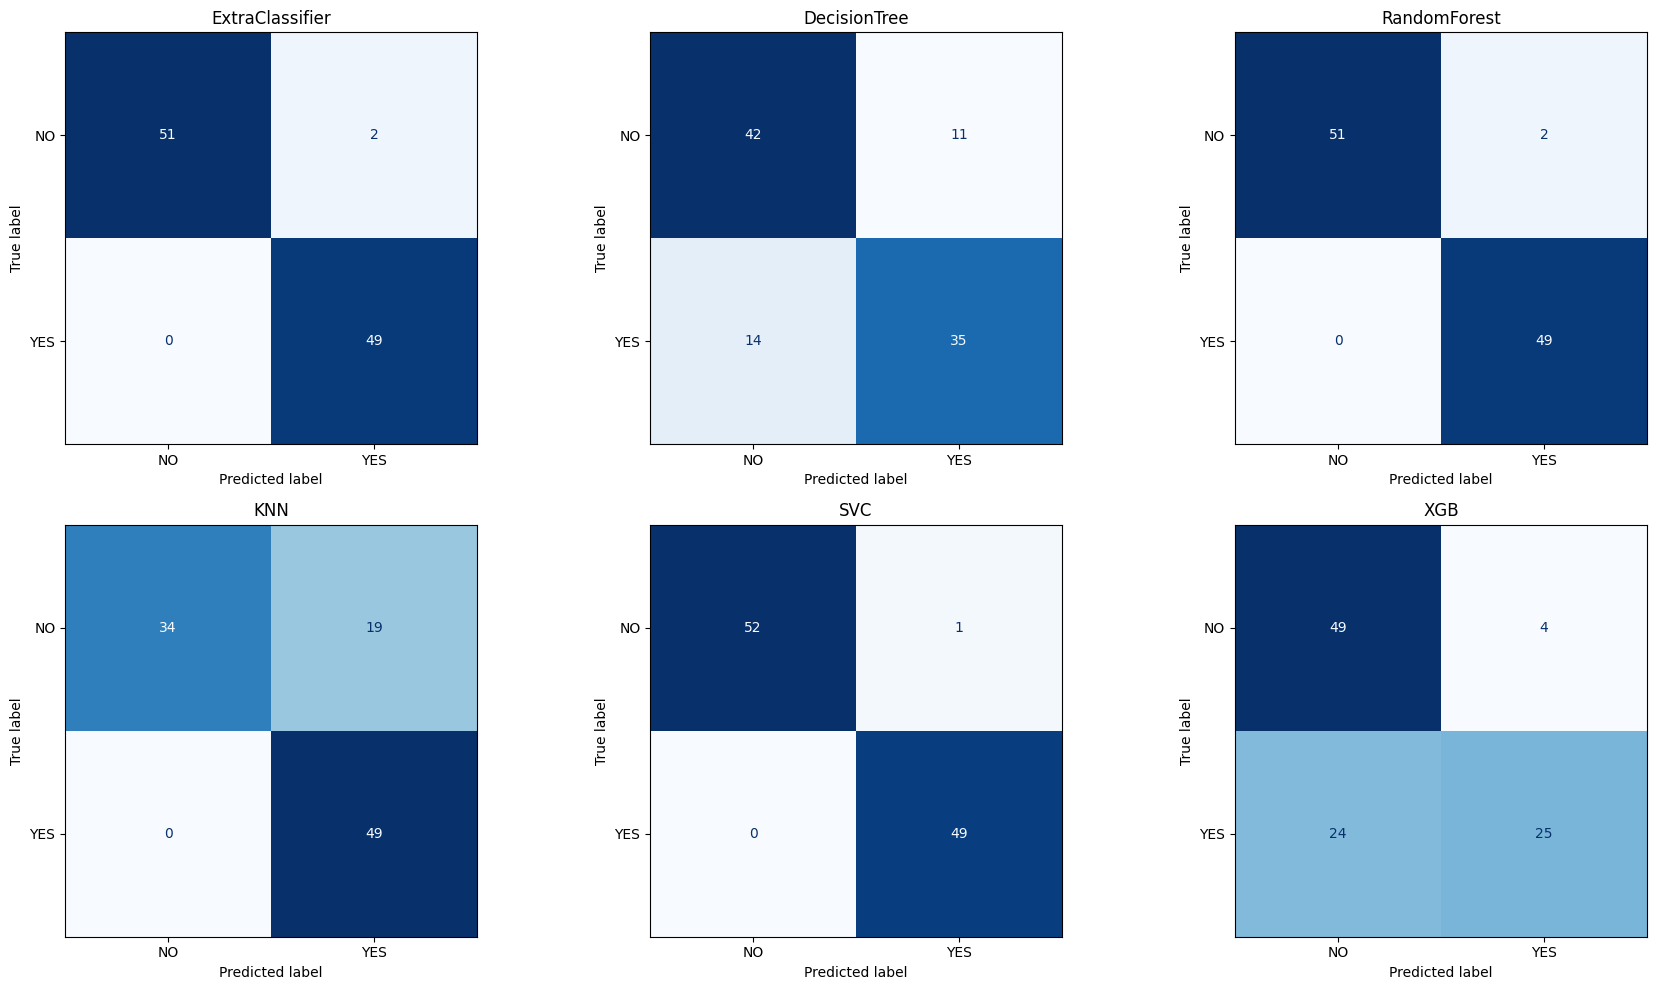

In [410]:
plt.figure(figsize=(18, 10))

# 1st Row
ax1 = plt.subplot(2, 3, 1)
ConfusionMatrixDisplay.from_estimator(Et, X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax1)
plt.title('ExtraClassifier')

ax2 = plt.subplot(2, 3, 2)
ConfusionMatrixDisplay.from_estimator(Dt, X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax2)
plt.title('DecisionTree')

ax3 = plt.subplot(2, 3, 3)
ConfusionMatrixDisplay.from_estimator(Rf,X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax3)
plt.title('RandomForest')

# 2nd Row
ax4 = plt.subplot(2, 3, 4)
ConfusionMatrixDisplay.from_estimator(knn, X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax4)
plt.title('KNN')

ax5 = plt.subplot(2, 3, 5)
ConfusionMatrixDisplay.from_estimator(svc, X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax5)
plt.title('SVC')

ax6 = plt.subplot(2, 3, 6)
ConfusionMatrixDisplay.from_estimator(XGB, X_test_trans,y_test_final, display_labels=['NO','YES'], cmap='Blues', colorbar=False, ax=ax6)
plt.title('XGB')

plt.tight_layout()
plt.show()


In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


models = {
    "ExtraTrees": Et,
    "DecisionTree": Dt,
    "RandomForest": Rf,
    "KNN": knn,
    "SVC": svc,
    "XGB": XGB
}

results = []


for name, model in models.items():
    y_pred = model.predict(X_test_trans)
    acc = accuracy_score(y_test_final, y_pred)
    prec = precision_score(y_test_final, y_pred)
    rec = recall_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)
    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3)
    })


df_metrics = pd.DataFrame(results)


In [412]:
df_metrics['Cross-Validation'] = [round(validation_E.mean(),2),round(validation_D.mean(),2),round(validation_R.mean(),2),
                            round(validation_knn.mean(),2),round(validation_sv.mean(),2),round(validation_xgb.mean(),2)]

In [413]:

df_metrics.sort_values(by="F1-score", ascending=False).style

,Model,Accuracy,Precision,Recall,F1-score,Cross-Validation
4,SVC,0.990000,0.980000,1.000000,0.990000,0.750000
0,ExtraTrees,0.980000,0.961000,1.000000,0.980000,0.950000
2,RandomForest,0.980000,0.961000,1.000000,0.980000,0.960000
3,KNN,0.814000,0.721000,1.000000,0.838000,0.690000
1,DecisionTree,0.755000,0.761000,0.714000,0.737000,0.860000
5,XGB,0.725000,0.862000,0.510000,0.641000,0.880000


* Evulation Table

# ROC-AUC Curve

In [414]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [415]:
models = {
    "ExtraTrees": Et,
    "DecisionTree": Dt,
    "RandomForest": Rf,
    "KNN": knn,
    "SVC": svc,
    "XGB": XGB
}

roc_data = {}

for name, model in models.items():
    # Some models (like SVC) require probability=True to use predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_trans)[:,1]  
    else:  
        y_prob = model.decision_function(X_test_trans)
    
    fpr, tpr, _ = roc_curve(y_test_final, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)


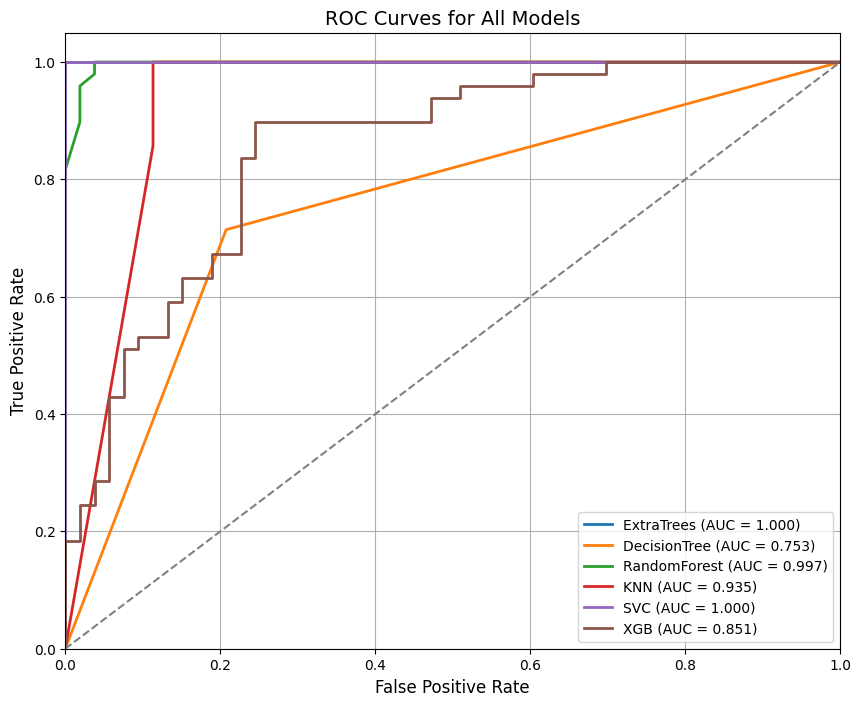

In [416]:
plt.figure(figsize=(10, 8))

for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Feature Importance for ExtraTrees

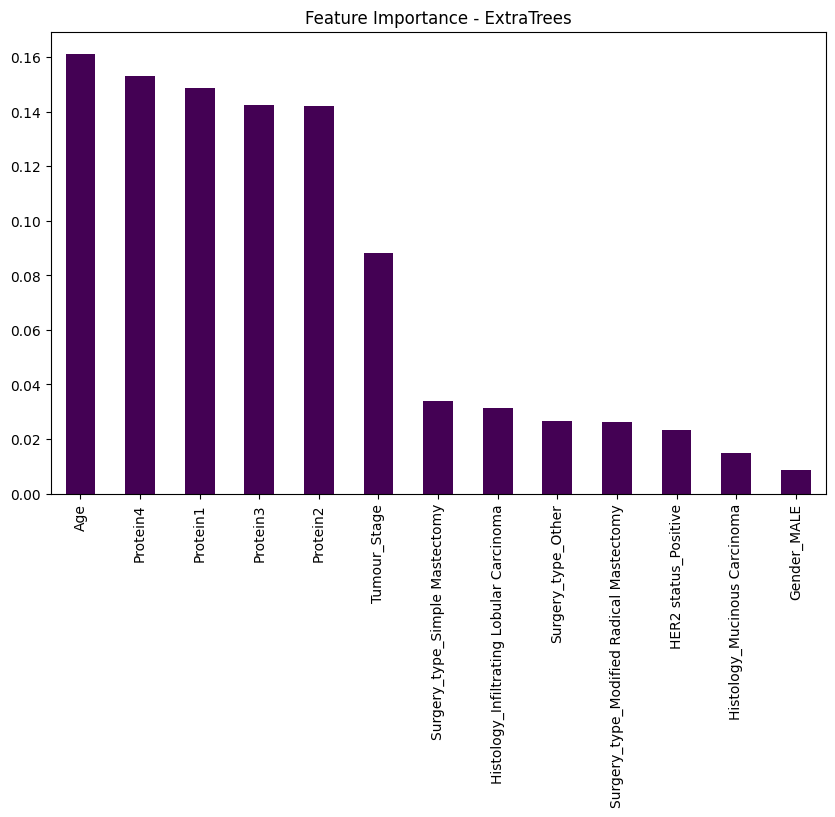

In [420]:
import pandas as pd
import matplotlib.pyplot as plt

importances = Et.feature_importances_
features = X_train_trans.columns 

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar',colormap ='viridis')
plt.title("Feature Importance - ExtraTrees")
plt.show()
